In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url="https://bit.ly/w-data"
data=pd.read_csv(url)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


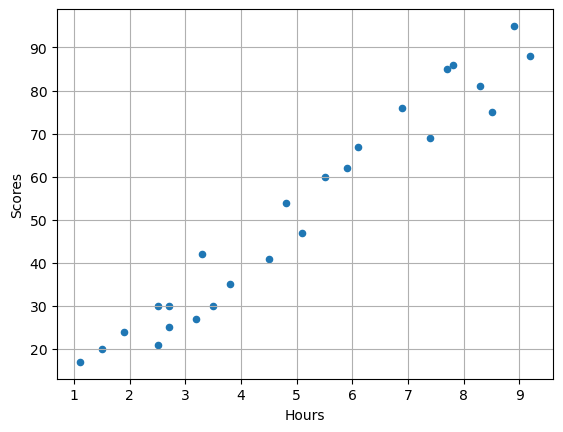

In [21]:
data.plot(kind='scatter',x='Hours',y='Scores',)
plt.grid()

In [22]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [23]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [24]:
Hours=data['Hours']
Scores=data['Scores']

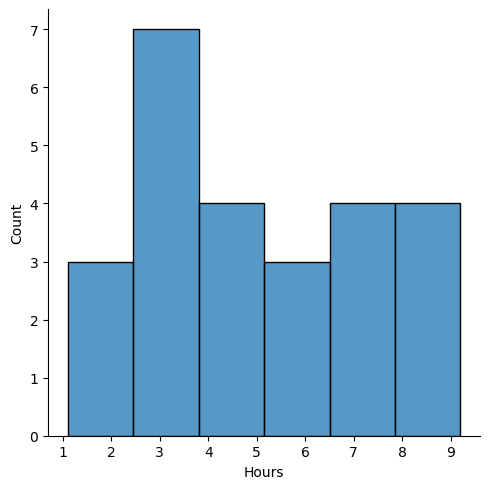

In [28]:
sns.displot(Hours)

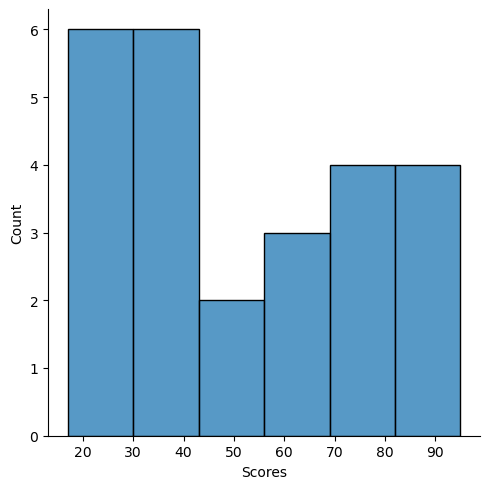

In [29]:
sns.displot(Scores)

In [30]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [36]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

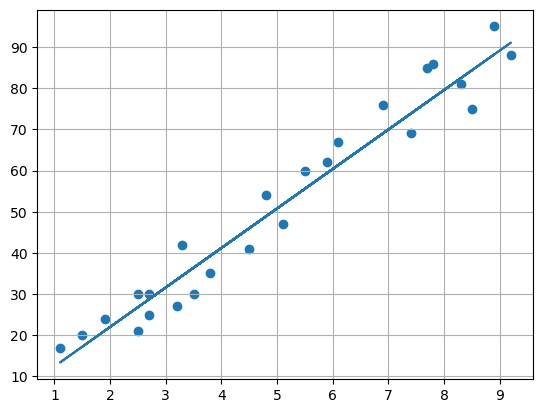

In [39]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.grid()
plt.show()

In [41]:
y_pred=reg.predict(x_test)

In [43]:
actual_predict=pd.DataFrame({'Target':y_test,'Predicted':y_pred})

In [44]:
actual_predict

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


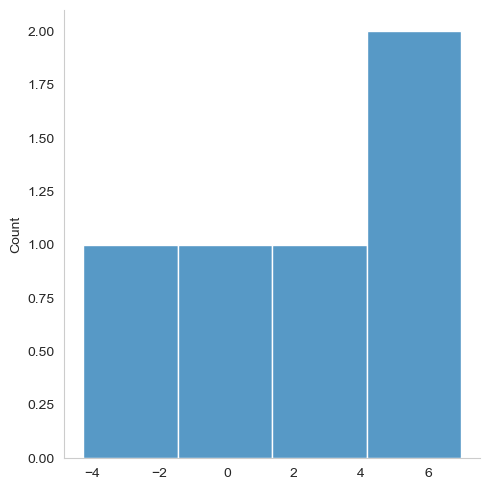

In [51]:
sns.set_style('whitegrid')
sns.displot(np.array(y_test-y_pred))
plt.grid()
plt.show()

In [52]:
h=9.25
s=reg.predict([[h]])
print('If a Student studies for {} hours per day/ she will score {} % in exam'.format(h,s))

If a Student studies for 9.25 hours per day/ she will score [91.56986604] % in exam


In [55]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))

Mean Absolute Error 4.5916495300630285
R2 Score : 0.971014141329942
